<a href="https://colab.research.google.com/github/rjaa2020/projects/blob/main/blackjack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
from numpy import random

In [2]:
class Deck():
    def __init__(self, n_decks=1):
        self.values = ['Ace', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'Jack', 'Queen', 'King']
        self.suites = ['Spades', 'Hearts', 'Clubs', 'Diamonds']
        self.deck = [f"{value} of {suite}" for suite in self.suites for value in self.values] * n_decks
        self.deck_size = len(self.deck)

    def update_deck_size(self):
        self.deck_size = len(self.deck)

    def __str__(self):
      return f"Deck of size {self.deck_size}"

In [3]:
class Player():
    def __init__(self, name):
        self.hand = []
        self.hand_value = 0
        self.name = name
        self.bust = False
        self.end_score = 0

    def __repr__(self):
        if self.bust:
          return f"{self.name} has busted with {self.hand}!"
        else:
          return f"{self.name} holds {self.hand} with value {self.hand_value}"

In [6]:
class BlackJack():
    def __init__(self, n_players=1, n_decks=1, seed=None):
        assert n_players > 0, "Must be at least one player"
        assert n_decks > 0, "Must be at least one"

        if seed is not None:
            random.seed(seed)

        self.deck = Deck(n_decks)
        self.dealer = Player("Dealer")
        self.players = [Player(f"Player {i}") for i in range(1, n_players + 1)]
        self.players_left = n_players
        self.deck_values = {f"{value} of {suite}": (10 if isinstance(value, str) and value != 'Ace' else value) for suite in self.deck.suites for value in self.deck.values}

    def check_bust(self, player):
        if player.hand_value > 21:
            player.bust = True

            size = len(player.name) + 20

            line1 = '----------------------'.center(size)
            line2 = f'!! {player.name} busted !!'.center(size)
            line3 = '----------------------'.center(size)

            print(f'{line1}\n{line2}\n{line3}\n')

    def get_card_value(self, card, player):
        if isinstance(card, str):
            if 'Ace' in card:
                return 11 if player.hand_value + 11 <= 21 else 1
        return self.deck_values[card]

    def pick_one_card(self, player):
        if player.bust:
            print(f"{player} cannot draw any more cards")
        else:
            card = self.deck.deck.pop(random.randint(0, len(self.deck.deck) - 1))
            self.deck.update_deck_size()
            value = self.get_card_value(card, player)

            player.hand += [card]
            player.hand_value += value

            return card

    def display_board(self, hide_dealer=True):
        print("\n--------------BLACKJACK----------------")
        if hide_dealer:
          print(f"Dealer's hand: [{self.dealer.hand[0]}, ?]")
        else:
          print(f"Dealer's hand: {self.dealer.hand}")

        for player in self.players:
            print(f"{player.name}'s hand: {player.hand}")

        print()

    def play_game(self):
      # Deal first two cards
        for _ in range(2):
            for player in [self.dealer] + self.players:
                self.pick_one_card(player)
        self.display_board(hide_dealer=True)

        for player in self.players:
            while not player.bust:
                print(f"{player.name}'s turn:")
                if input(f"Current value is {player.hand_value}. Do you want to hit? (yes/no): ").lower() == 'yes':
                    self.pick_one_card(player)
                    self.display_board()
                    self.check_bust(player)
                else:
                    break

        # Dealer's turn
        print("Dealer's turn:", end='')
        self.display_board(hide_dealer=False)
        while not self.dealer.bust and self.dealer.hand_value < 17:
            time.sleep(1)
            self.pick_one_card(self.dealer)
            self.display_board(hide_dealer=False)
            self.check_bust(self.dealer)

        # Determine winners
        print("\n+++++++++++++++++++++++++++++++++++++++")
        print("Final state of the game:", end='')
        self.display_board(hide_dealer=False)

        for player in [self.dealer] + self.players:
            player.end_score = player.hand_value * (not player.bust)
            print(f"{player.name}'s hand is worth {player.end_score}")

            if player.name != 'Dealer' and not player.bust:
                if self.dealer.bust or player.hand_value > self.dealer.hand_value:
                    print(f"{player.name} wins!")
                elif player.hand_value < self.dealer.hand_value:
                    print(f"{player.name} loses!")
                else:
                    print(f"{player.name} ties with the dealer!")
            elif player.name != 'Dealer':
              print(f"{player.name} busted with {player.hand_value} points")


In [7]:
blackjack_game = BlackJack(n_players=1, n_decks=1, seed=None)
blackjack_game.play_game()


--------------BLACKJACK----------------
Dealer's hand: [King of Hearts, ?]
Player 1's hand: ['9 of Spades', '2 of Clubs']

Player 1's turn:
Current value is 11. Do you want to hit? (yes/no): yes

--------------BLACKJACK----------------
Dealer's hand: [King of Hearts, ?]
Player 1's hand: ['9 of Spades', '2 of Clubs', 'Queen of Hearts']

Player 1's turn:
Current value is 21. Do you want to hit? (yes/no): no
Dealer's turn:
--------------BLACKJACK----------------
Dealer's hand: ['King of Hearts', '7 of Clubs']
Player 1's hand: ['9 of Spades', '2 of Clubs', 'Queen of Hearts']


+++++++++++++++++++++++++++++++++++++++
Final state of the game:
--------------BLACKJACK----------------
Dealer's hand: ['King of Hearts', '7 of Clubs']
Player 1's hand: ['9 of Spades', '2 of Clubs', 'Queen of Hearts']

Dealer's hand is worth 17
Player 1's hand is worth 21
Player 1 wins!


In [8]:
class LongTermPlayer(Player):
  def __init__(self, name):
    super().__init__(name)
    self.long_term_score = 0

  def reset_hand(self):
      self.hand = []
      self.hand_value = 0
      self.bust = False
      self.end_score = 0

class MultiBlackJack(BlackJack):
  def __init__(self, n_players = 1, n_decks = 1, seed = None):
    super().__init__(n_players, n_decks, seed)

    self.dealer = LongTermPlayer("Dealer")
    self.players = [LongTermPlayer(f"Player {i}") for i in range(1, n_players + 1)]

In [9]:
bj = MultiBlackJack(n_players = 1, n_decks = 1, seed = 0)
bj.play_game()


--------------BLACKJACK----------------
Dealer's hand: [6 of Diamonds, ?]
Player 1's hand: ['10 of Diamonds', '5 of Spades']

Player 1's turn:
Current value is 15. Do you want to hit? (yes/no): yes

--------------BLACKJACK----------------
Dealer's hand: [6 of Diamonds, ?]
Player 1's hand: ['10 of Diamonds', '5 of Spades', '6 of Spades']

Player 1's turn:
Current value is 21. Do you want to hit? (yes/no): no
Dealer's turn:
--------------BLACKJACK----------------
Dealer's hand: ['6 of Diamonds', 'Ace of Spades']
Player 1's hand: ['10 of Diamonds', '5 of Spades', '6 of Spades']


+++++++++++++++++++++++++++++++++++++++
Final state of the game:
--------------BLACKJACK----------------
Dealer's hand: ['6 of Diamonds', 'Ace of Spades']
Player 1's hand: ['10 of Diamonds', '5 of Spades', '6 of Spades']

Dealer's hand is worth 17
Player 1's hand is worth 21
Player 1 wins!


# Empirically Generating Transtion Matrix

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

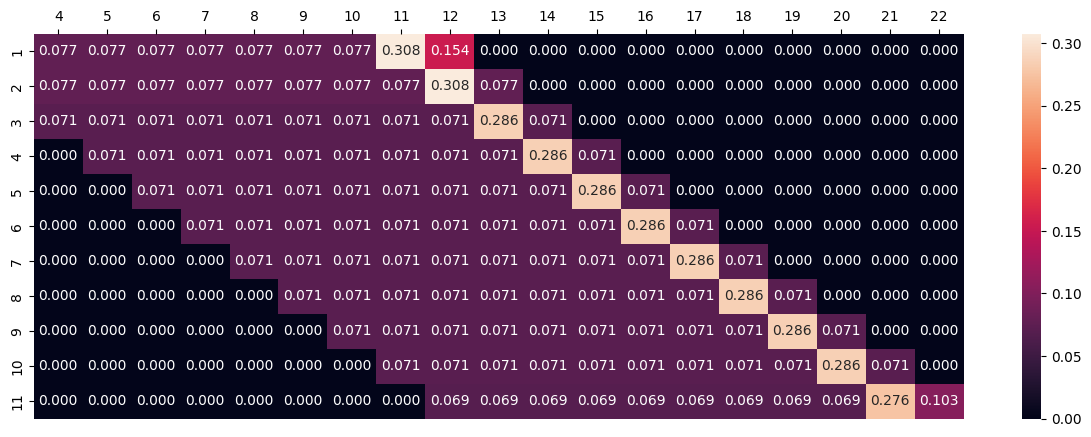

In [47]:
bjack = BlackJack()
deck = bjack.deck

probs = np.zeros((12, 23))

for c1 in deck.deck:
  for c2 in deck.deck:

    value1 = bjack.get_card_value(c1, bjack.dealer)
    value2 = bjack.get_card_value(c2, bjack.dealer)

    if c1.startswith('Ace') and c2.startswith('Ace'):
      for value1 in [1, 11]:
        for value2 in [1, 11]:
          probs[value1, value1+value2] += 1
    if c1.startswith('Ace'):
      for value1 in [1, 11]:
        probs[value1, value1+value2] += 1
    if c2.startswith('Ace'):
      for value2 in [1, 11]:
        probs[value1, value1+value2] += 1

    else:
      probs[value1, value1+value2] += 1

fig, axs = plt.subplots(figsize=(15, 5))
data = probs[1:, 4:]

# Define new x and y tick labels based on the shifted data
new_xticklabels = [str(i) for i in range(4, 23)]
new_yticklabels = [str(i) for i in range(1, 12)]

data_pct = data / np.reshape(np.sum(data, axis=1), (11, -1))

ax = sns.heatmap(data_pct, annot=True, fmt='.3f', xticklabels=new_xticklabels, yticklabels=new_yticklabels)
ax.xaxis.tick_top()

plt.show()

# Naive Q-Table Agent

In [12]:
from collections import defaultdict
import numpy as np

In [13]:
class BlackJack_env():
  def __init__(self):
    self.states = range()

In [14]:
class QAgent:
    def __init__(self, states, actions):
      self.actions = actions
      self.states = states
      self.n_actions = len(actions)
      self.n_states = len(states)
      self.q_values = np.array((self.n_states, self.n_actions))

agent = QAgent(states=range(31), actions=['hit', 'stay'])
agent.q_values

array([31,  2])

# Generating Transition Matrix with Monte-Carlo Simulations

In [52]:
from pprint import pprint
import pandas as pd
from scipy.special import softmax

In [48]:
def simulate_blackjack():
    deck = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11] * 4  # Standard deck of 52 cards
    random.shuffle(deck)

    player_hand = [deck.pop(), deck.pop()]  # Player's initial hand
    dealer_hand = [deck.pop(), deck.pop()]  # Dealer's initial hand

    player_states = [sum(player_hand)]  # List to store player's states
    dealer_visible_card = dealer_hand[0]  # Dealer's visible card

    # Player's turn
    while sum(player_hand) < 21:
        # Implement your player strategy here
        # For simplicity, let's assume the player always hits if their total is less than 17
        if sum(player_hand) < 17:
            player_hand.append(deck.pop())
            player_states.append(sum(player_hand))
        else:
            break

    # Dealer's turn
    while sum(dealer_hand) < 17:
        dealer_hand.append(deck.pop())

    # Determine the winner
    player_total = sum(player_hand)
    dealer_total = sum(dealer_hand)

    if player_total > 21:  # Player busts
        reward = -1
    elif dealer_total > 21:  # Dealer busts
        reward = 1
    elif player_total > dealer_total:  # Player wins
        reward = 1
    elif player_total < dealer_total:  # Dealer wins
        reward = -1
    else:  # Tie
        reward = 0

    # Return states and actions taken during the game
    return player_states, reward

def calculate_transition_probabilities(num_episodes):
    transition_counts = {}  # Dictionary to store transition counts

    # Simulate Blackjack gameplay and collect transition data
    for _ in range(num_episodes):
        states, _ = simulate_blackjack()

        for i in range(len(states) - 1):
            current_state = states[i]
            next_state = states[i + 1]

            # Increment transition count
            if current_state not in transition_counts:
                transition_counts[current_state] = {}

            if next_state not in transition_counts[current_state]:
                transition_counts[current_state][next_state] = 0

            transition_counts[current_state][next_state] += 1

    transition_probabilities = {}  # Dictionary to store transition probabilities

    # Calculate transition probabilities from transition counts
    for state, successors in transition_counts.items():
        total_count = sum(successors.values())
        transition_probabilities[state] = {next_state: count / total_count for next_state, count in successors.items()}


    return transition_probabilities

In [55]:
num_episodes = 100000
transition_probabilities = calculate_transition_probabilities(num_episodes)
pprint(transition_probabilities, sort_dicts=True)

{4: {6: 0.019693654266958426,
     7: 0.07658643326039387,
     8: 0.05908096280087528,
     9: 0.1050328227571116,
     10: 0.08971553610503283,
     11: 0.07439824945295405,
     12: 0.0787746170678337,
     13: 0.10065645514223195,
     14: 0.30196936542669583,
     15: 0.09409190371991247},
 5: {7: 0.05232067510548523,
     8: 0.06244725738396625,
     9: 0.0759493670886076,
     10: 0.07257383966244725,
     11: 0.08860759493670886,
     12: 0.08270042194092828,
     13: 0.07088607594936709,
     14: 0.07932489451476793,
     15: 0.3308016877637131,
     16: 0.08438818565400844},
 6: {8: 0.05697329376854599,
     9: 0.06943620178041543,
     10: 0.0629080118694362,
     11: 0.08130563798219585,
     12: 0.09080118694362017,
     13: 0.07002967359050445,
     14: 0.08664688427299704,
     15: 0.08130563798219585,
     16: 0.3056379821958457,
     17: 0.09495548961424333},
 7: {9: 0.07244655581947744,
     10: 0.062153602533650036,
     11: 0.07482185273159145,
     12: 0.0724465558

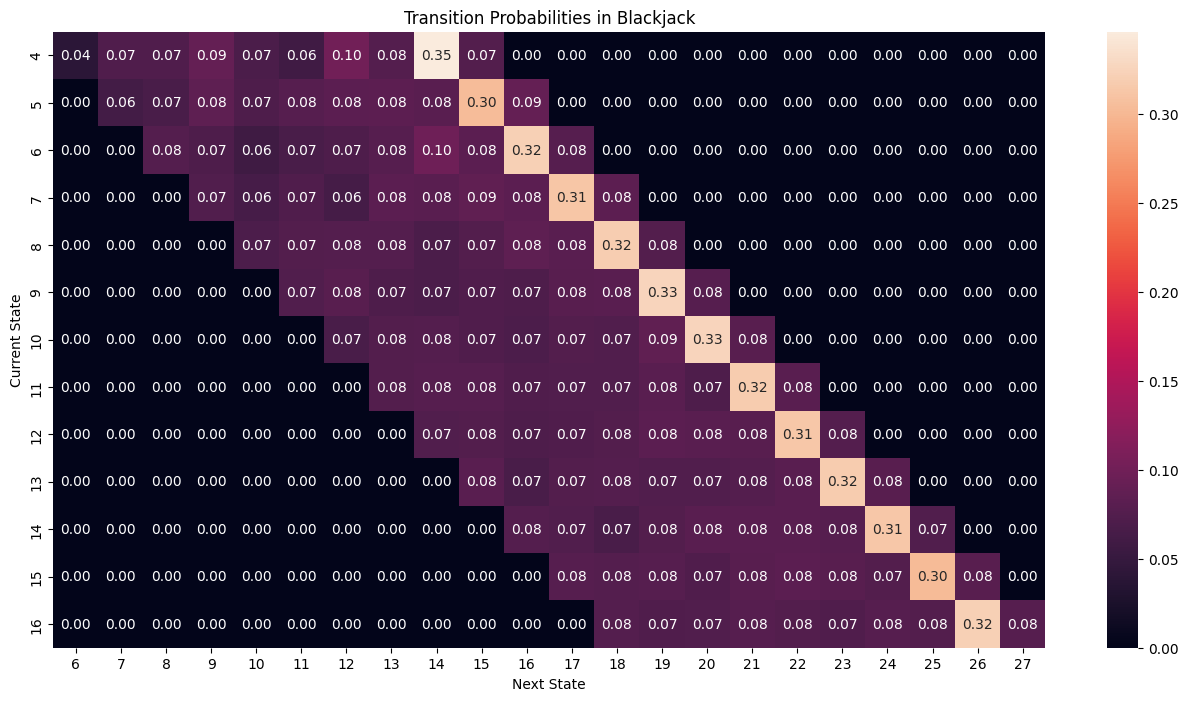

In [51]:
# Convert transition probabilities dictionary to DataFrame
transition_df = pd.DataFrame.from_dict(transition_probabilities, orient='index').fillna(0)

transition_df = transition_df.sort_index()
transition_df = transition_df.reindex(sorted(transition_df.columns), axis=1)

# Create heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(transition_df, annot=True, fmt=".2f")
plt.title('Transition Probabilities in Blackjack')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

<Axes: >

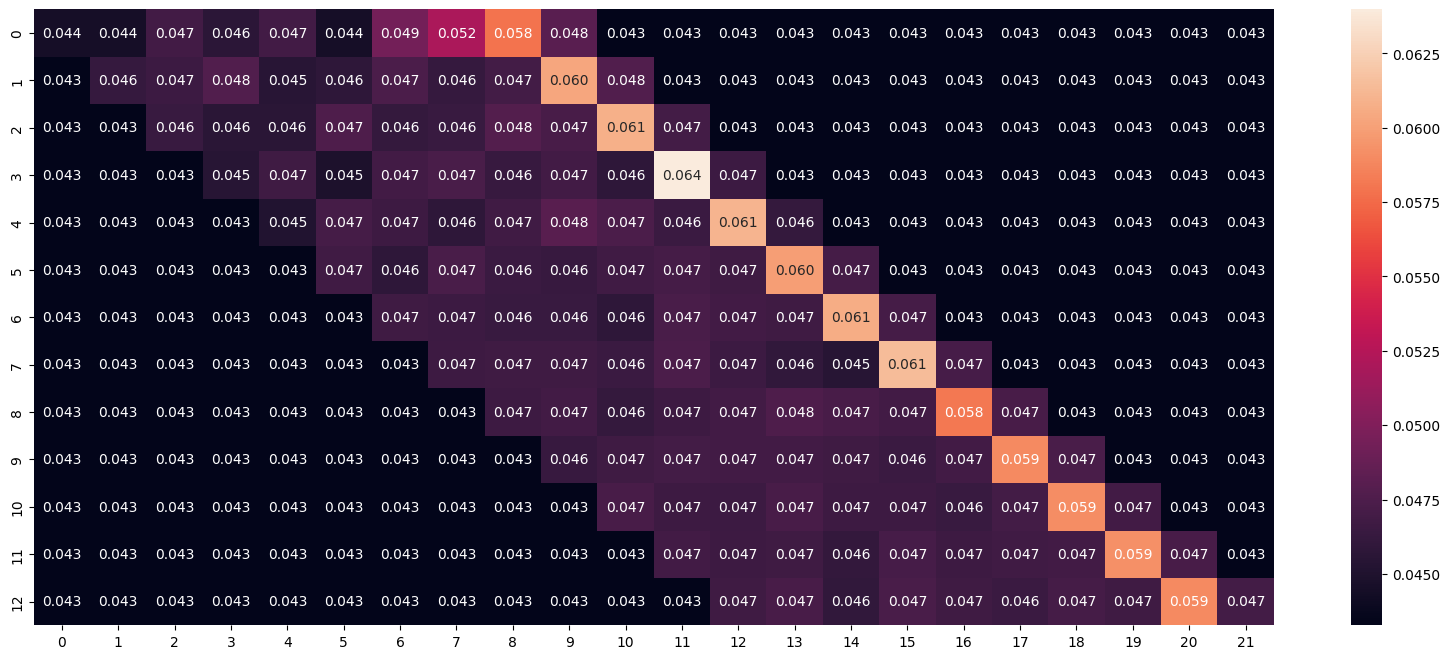

In [31]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.heatmap(softmax(transition_df, axis=1), annot=True, fmt='0.3f')